<a href="https://colab.research.google.com/github/eleaz1/ActividadesIA/blob/main/Actividad_4_M%C3%A9todos_de_aprendizaje_no_supervisado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np

# Generar un dataset de ejemplo
np.random.seed(42)
rutas = ['Ruta_A', 'Ruta_B', 'Ruta_C', 'Ruta_D']
clima = ['soleado', 'lluvia', 'nublado']

datos = {
    'Ruta': np.random.choice(rutas, size=1000),
    'Hora_dia': np.random.randint(0, 24, size=1000),
    'Pasajeros': np.random.randint(5, 100, size=1000),
    'Dia_semana': np.random.choice(['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo'], size=1000),
    'Clima': np.random.choice(clima, size=1000)
}

df = pd.DataFrame(datos)
print(df.head())

# Convertir variables categóricas a variables numéricas
df_encoded = pd.get_dummies(df, drop_first=True)

     Ruta  Hora_dia  Pasajeros Dia_semana    Clima
0  Ruta_C        21         35     Jueves  nublado
1  Ruta_D        16         86     Jueves  nublado
2  Ruta_A         8          6  Miércoles  nublado
3  Ruta_C         0         82     Martes  nublado
4  Ruta_C        20         81     Sábado  nublado


     Ruta  Hora_dia  Pasajeros Dia_semana    Clima  Cluster
0  Ruta_C        21         35     Jueves  nublado        1
1  Ruta_D        16         86     Jueves  nublado        1
2  Ruta_A         8          6  Miércoles  nublado        3
3  Ruta_C         0         82     Martes  nublado        0
4  Ruta_C        20         81     Sábado  nublado        1


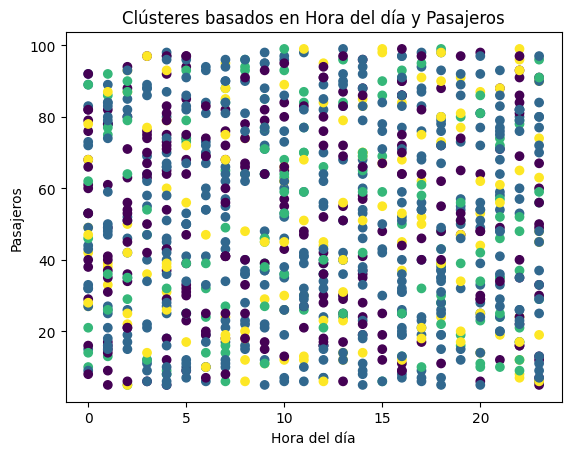

In [6]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Normalizar los datos
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_encoded)

# Definir y entrenar el modelo K-Means
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(df_scaled)

# Obtener las etiquetas de los clusters
df['Cluster'] = kmeans.labels_

# Ver los primeros resultados
print(df[['Ruta', 'Hora_dia', 'Pasajeros', 'Dia_semana', 'Clima', 'Cluster']].head())

# Visualización de los clústeres en un gráfico 2D (usando dos características)
plt.scatter(df['Hora_dia'], df['Pasajeros'], c=df['Cluster'], cmap='viridis')
plt.xlabel('Hora del día')
plt.ylabel('Pasajeros')
plt.title('Clústeres basados en Hora del día y Pasajeros')
plt.show()

In [3]:
print(f"Inercia del modelo: {kmeans.inertia_}")
from sklearn.metrics import silhouette_score
score = silhouette_score(df_scaled, kmeans.labels_)
print(f"Coeficiente de Silueta: {score}")

Inercia del modelo: 10757.01575263513
Coeficiente de Silueta: 0.1420491516867491
